### 函数

函数作为参数使用

In [2]:
def square(x):
    return x*x

def squareAnd(a,b,f):
    ret = f(a)+f(b)
    return ret

result = squareAnd(2,4,square)
print(result)

20


#### 作用域

[函数相关](http://www.cnblogs.com/yuanchenqi/articles/5828233.html)
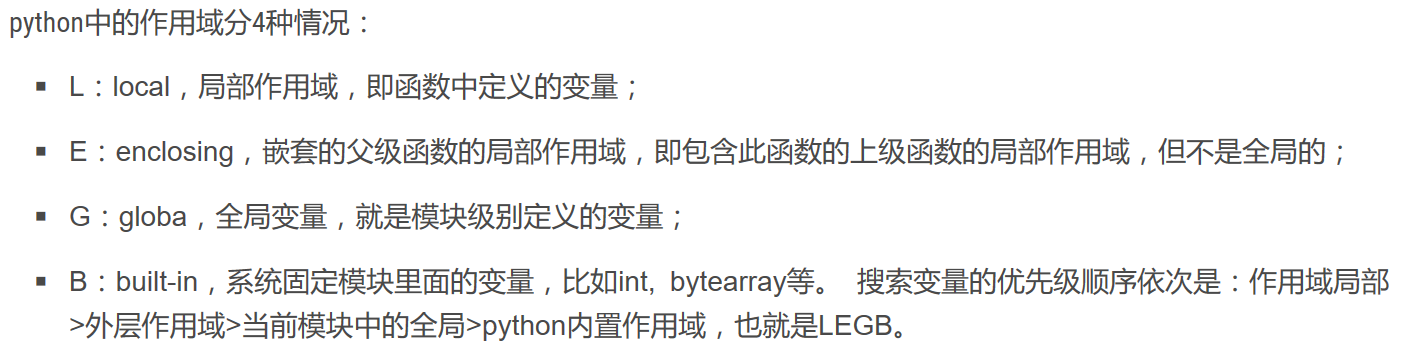

In [22]:
# if True:
#     a = 3;

# print(a)
# if没有自己的作用域


# 函数有自己的作用域，函数里面的a只能在函数体内使用
def f():
    a = 3;
f()
print(a)

3


In [36]:
x = int(2.9) #build-in
 
g_count = 0  #global

# nonlocal关键字的使用

def outer():
    o_count = 1  #enclosing
    
    def inner():
        nonlocal o_count
        o_count = 3
        i_count = 2  #local
        print(i_count)
        print(o_count)
    inner()
outer()

2
3


In [33]:
# ****此时会报错，原因是在定义之前使用了。****
# 在局部作用域里面的count操作会出错，因为不允许修改全局作用域的count，需要使用关键字global

count = 10

def outer():
    count = count +1
    print(count)

outer()

UnboundLocalError: local variable 'count' referenced before assignment

In [50]:
# 此时也会报错，报错的原因是在输出count的时候，首先在local作用域的时候发现count在使用之后才定义的。

# count = 10
# 注释掉局部作用域的count还是报同样的错误。
def outer():
   #count被加载到内存中的局部作用域，在使用print输出的时候，会先在局部作用域找，可以找到，但是是发现在定义之前就使用了，所以报错
    print(count)
    count = 5
outer()

NameError: name 'count2' is not defined

In [51]:
# global 使用
count = 10

def outer():
    global count
    count = count +1
    print(count)

outer()

11


#### 递归函数

函数阶乘,但凡是递归可以做的，循环都可以做。
递归的效率在很多时候很低，不推荐使用

In [61]:
def factorial(n):
    if n == 1:
        return n
    else:
        return n*factorial(n-1)
    
result = factorial(4)
print(result)

24


斐波那契数列

In [1]:
def fibo(n):
    if n == 1 or n==2:
        return 1
#     if n == 0:
#         return 0
    else:
        return fibo(n-1)+fibo(n-2)
        
for i in range(10):
    print(fibo(i+1),end=" ")

1 1 2 3 5 8 13 21 34 55 

#### 内置函数

详细使用在文档里面查看
[内置函数](https://docs.python.org/2/library/functions.html)

In [8]:
# all方法
print(all([1,2,3,""]))
print(all([" ",None]))
print(all([" ",True]))
print(all([" ",False]))

False
False
True
False


##### 几个重要的内置函数

filter() 函数的返回值是迭代器，需要经过list  tuple等函数处理后才可以输出

In [2]:
string = ['h','e','l','l','o']

def func1(a):
    if a != 'e':
        return True
ret = filter(func1,string)
# 可以决定是输出列表还是元组
# print(list(ret))
print(tuple(ret))

('h', 'l', 'l', 'o')


用filter求素数，思想可以参考https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000/001431821084171d2e0f22e7cc24305ae03aa0214d0ef29000

In [7]:
# 先构造一个从3开始的奇数序列
def odd_iter():
    n = 1
    while True:
        n  = n+2
        yield n

# 筛选函数  不能整除的时候返回一个函数
def not_divisible(n):
    return lambda x:x%n>0

def primes():
    yield 2
    it = odd_iter()
    while True:
        n = next(it)
        yield n
        it = filter(not_divisible(n),it)
    
p = primes()
print(next(p))
print(next(p))
print(next(p))
print(next(p))
print(next(p))

2
3
5
7
11


使用filter()筛选出回数12321  909

In [21]:
import math
def is_palindrome(n):
    #将数字转成字符串，然后转换成列表
    L = list(str(n))
    for i in range(math.ceil(len(L)/2)):
        if L[i] == L[len(L)-i-1]:
            pass
        else:
            return False
    return True

print(is_palindrome(909))
print(is_palindrome(9999))
print(is_palindrome(1234567654322))

list1 =  filter(is_palindrome,range(1,1000))
print(list(list1))



True
True
False
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 22, 33, 44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262, 272, 282, 292, 303, 313, 323, 333, 343, 353, 363, 373, 383, 393, 404, 414, 424, 434, 444, 454, 464, 474, 484, 494, 505, 515, 525, 535, 545, 555, 565, 575, 585, 595, 606, 616, 626, 636, 646, 656, 666, 676, 686, 696, 707, 717, 727, 737, 747, 757, 767, 777, 787, 797, 808, 818, 828, 838, 848, 858, 868, 878, 888, 898, 909, 919, 929, 939, 949, 959, 969, 979, 989, 999]


map() 返回的结果是Iterator

In [29]:
string = ['h','e','l','l','o']

def func1(a):
    return "* "+a+" *"
ret = map(func1,string)
print(list(ret))

['* h *', '* e *', '* l *', '* l *', '* o *']


reduce() 放在了functools模块下面

In [32]:
from functools import reduce

def ad(a,b):
    return a+b

print(reduce(ad,[1,2,3,4,5]))

15


lambda  匿名函数，冒号后面的代码是代表 return a+b,lambda后面接参数

In [1]:
from functools import reduce

print(reduce(lambda a,b:a+b,[1,2,3,4,5]))

func1 = lambda a,b:a+b
print(func1(1,2))

NameError: name 'reduce' is not defined

函数参数  [廖雪峰函数参数](https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000/001431752945034eb82ac80a3e64b9bb4929b16eeed1eb9000)

##### 可变参数

In [6]:
# number是tuple类型
def calc(*number):
    print(type(number))
    for i in number:
        print(i,end=" ")

calc(1,2,3,4)
calc()
    

<class 'tuple'>
1 2 3 4 <class 'tuple'>


如果已经有一个list或者tuple，想当成可变参数传递可以在传递的列表或者元组前面加一个*。

In [16]:
list1 = [1,2,3,4,5]

def calc(*number):
    print(type(number))
    print(number)
    for i in number:
        print(i,end=" ")
# 注意看number的结构
calc(list1)
print("\n******************")
calc(*list1)

<class 'tuple'>
([1, 2, 3, 4, 5],)
[1, 2, 3, 4, 5] 
******************
<class 'tuple'>
(1, 2, 3, 4, 5)
1 2 3 4 5 

#### 关键字参数


允许传入0个或者任意个含参数名的参数，这些关键字参数在函数内部自动组装成一个dict,kw用于接受关键字参数

**作用** 
试想你正在做一个用户注册的功能，除了用户名和年龄是必填项外，其他都是可选项，利用关键字参数来定义这个函数就能满足注册的需求。


In [1]:
def person(name,age,**kw):
    print("name=%s,age=%d,other=%s"%(name,age,kw))

person('Mickle',30,city="beijing",job='engineer')

# 使用两个**将dict转换成关键字参数传入。
extra = {
    "city":"Beijing",
    "job":"Engineer"
}
person('Mickle',30,**extra)


name=Mickle,age=30,other={'city': 'beijing', 'job': 'engineer'}
name=Mickle,age=30,other={'city': 'Beijing', 'job': 'Engineer'}


#### 高阶函数，就是让函数的参数能够接受别的函数

#### 偏函数

引出  int函数默认按十进制转换。

In [7]:
# 将16【8进制】转换成10进制
print(int('16',base=8))
print(int('12345',16))

# 每次都传入base比较麻烦
def int2(x,base=2):
    return int(x,base)
print(int2('10001'))

14
74565
17


functools.partial,就是将一个函数的某些参数给固定住，也就是设置默认值，返回一个新函数，从而变得简单一些。

注意传入\*args **kw参数是的差别

In [10]:
import functools

int2 = functools.partial(int,base=2)

print(int2("10010"))

18
